<a href="https://colab.research.google.com/github/bala-codes/BENIGN-VS-MALIGNANT-URL-ML-CLASSIFIER/blob/master/codes%20(ML)/Part-1%20-%20TWITTER%20%20-%20Sentiment%20Analysis%20-%20DATA%20SEGREGATION%20AND%20DATA%20PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# To get twitter access codes, visit this link https://developer.twitter.com/en/application/use-case

In [ ]:
import pandas as pd  
import tweepy
pd.set_option('display.max_rows', 10000000)
pd.set_option('display.max_columns', 1000000)

### BALAKRISHNA KUMAR ### DONOT SHAR THE SECRET CODES ###
consumer_key = 'REPLACE YOUR consumer_key HERE' 
consumer_secret = 'REPLACE YOUR consumer_secret HERE'
access_token = 'REPLACE YOUR access_token HERE'
access_token_secret = 'REPLACE YOUR access_token_secret HERE'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
print("Authorization Successfull")

In [ ]:
# CREATING A FUNCTION THAT PROVIDES THE TWEETS RELATED TO A PARTICULAR TOPIC
def get_related_tweets(key_word):
    twitter_users = []
    tweet_time = []
    tweet_string = [] 
    for tweet in tweepy.Cursor(api.search,q=key_word, count=1000).items(1000):
            if (not tweet.retweeted) and ('RT @' not in tweet.text):
                if tweet.lang == "en":
                    twitter_users.append(tweet.user.name)
                    tweet_time.append(tweet.created_at)
                    tweet_string.append(tweet.text)
    df = pd.DataFrame({'name':twitter_users, 'time': tweet_time, 'tweet': tweet_string})
    
    return df 

In [ ]:
df_gb = get_related_tweets("ADMK")
print(df_gb.head())

                       name                time  \
0                       ARK 2020-07-25 13:10:59   
1                 jai bheem 2020-07-25 13:10:45   
2           TN for a change 2020-07-25 13:10:08   
3           TN for a change 2020-07-25 13:09:46   
4  𝙋𝙤𝙡𝙞𝙩𝙞𝙘𝙤𝙚𝙩𝙝𝙞𝙘𝙖𝙡 𝘽𝙚𝙞𝙣𝙜©️™ 2020-07-25 13:09:33   

                                               tweet  
0  @BUSHINDIA Unfortunately Tamils vote based on ...  
1  @annapoorani_2 Haha sister. But nothing has ch...  
2  What the hell is this, why you say Kaavi?. If ...  
3  @Kalaignarnews What the hell is this, why you ...  
4  @savukku Let us open savukku's mouth and every...  


In [ ]:
for i in range(0,10):
    print(df_gb['tweet'].iloc[i])

@BUSHINDIA Unfortunately Tamils vote based on emotions or face, DMK r experts in catching emotions , MGR/ Jaya reli… https://t.co/gSfnJxQnZD
@annapoorani_2 Haha sister. But nothing has changed till now. What are thinking tn has changed and revolution is go… https://t.co/tTGW7b0Vs3
What the hell is this, why you say Kaavi?. If you want to target a party mention its name. Kaavi dress is something… https://t.co/f53oK5supV
@Kalaignarnews What the hell is this, why you say Kaavi?. If you want to target a party mention its name. Kaavi dre… https://t.co/QP0hFxCvtT
@savukku Let us open savukku's mouth and everyone shall urinate inside his mouth.
Let him enjoy the taste as dmk does
#திருட்டு_திமுக

The joke of the century is DMK has a rank Muslim Party as its alliance partner and calls itself as… https://t.co/KaBxJH8vQy
#திமுக_கறுப்பர்_கூட்டம்

Couldn’t stop laughing. Block sangis, ADMK, PMK, .... don’t forget to block Rajini Support… https://t.co/fDaBRbSrew
@NallappanarG No way.... The slums b

# THE ABOVE METHOD DESCRIBES , HOW WE SHOULD ACCESS TWITTER WITH KEYWORDS AND GATHER DATA, STORE THEM AS DATAFRAME , THEN USE IT IN OUR MODEL.

# BUT FOR THE SAKE OF THE PROJECT, WE ARE NOT GOING TO WASTE TIME ON GATHERING DATA, SO WE WILL USE AN ALREADY EXISTING TWITTER DATASET AND PROCESS THEM.

In [ ]:
#Importing the libraries which are required.

import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
columns = ['label','id','timestamp','query', 'userid', 'text']
df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/TWITTER ANALYSIS - FINAL DATASETS/twitter training dataset.csv',error_bad_lines=False, encoding='ISO-8859-1', names = columns) # If you have your input file as .csv format
df = pd.DataFrame(df)
df['label'] = df['label'].replace(to_replace = [4], value = [1])
df.head()

,label,id,timestamp,query,userid,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# STORING ONLY THE REQUIRED COLUMNS FROM THE ABOVE DATASET AND WILL BE USING THEM FOR FUTHER ANALYSIS

df.to_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/TWITTER ANALYSIS - FINAL DATASETS/final_df_tweets.csv', columns = ['label', 'text'], index=False)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/TWITTER ANALYSIS - FINAL DATASETS/final_df_tweets.csv') # If you have your input file as .csv format
df = pd.DataFrame(df)
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
print(df.info())
print("SHAPE",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
label    1600000 non-null int64
text     1600000 non-null object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None
SHAPE (1600000, 2)


In [ ]:
df.groupby("label").describe()

text                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
1      800000  793506              good morning   118

# IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

NameError: ignored

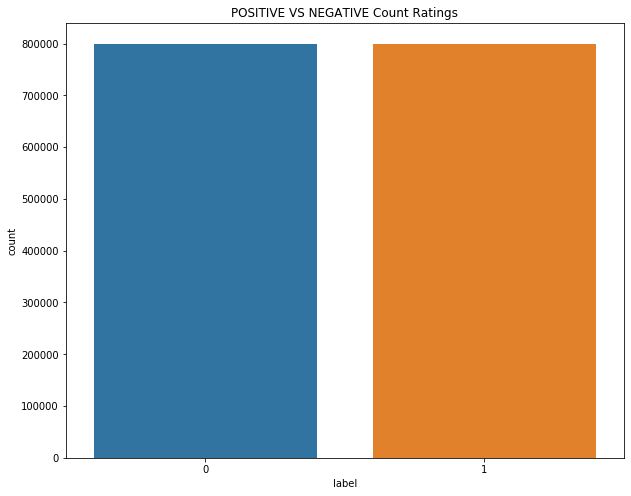

In [ ]:
plt.figure(figsize=(10,8))
plt.title('POSITIVE VS NEGATIVE Count Ratings')
sns.countplot(df['label'])
plt.show()

# HERE WE DROP ALL THE DUPLICATES ROWS IF EXISTS IN THE DATAFRAME

In [ ]:
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)

In [ ]:
def word_count(sentence):
  return len(sentence.split())

df['word count'] = df['text'].apply(word_count)
df.head()

,label,text,word count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,is upset that he can't update his Facebook by ...,21
2,0,@Kenichan I dived many times for the ball. Man...,18
3,0,my whole body feels itchy and like its on fire,10
4,0,"@nationwideclass no, it's not behaving at all....",21


In [ ]:
import matplotlib.pyplot as plt
x = df['word count'][df.label == 0]
y = df['word count'][df.label == 1]
x.head()

0    19
1    21
2    18
3    10
4    21
Name: word count, dtype: int64

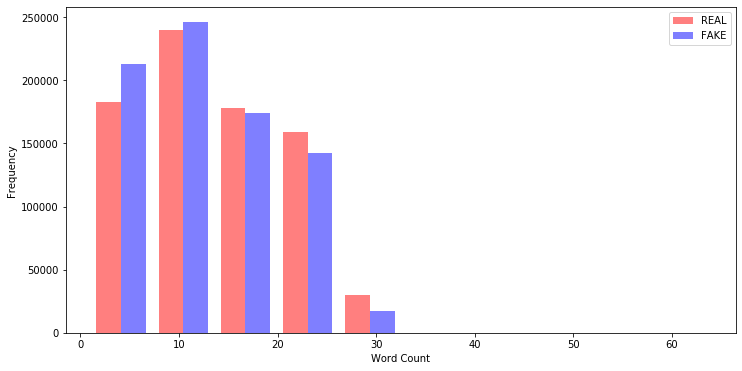

In [ ]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([x, y],color = ['r','b'], alpha = 0.5,label = ['REAL','FAKE'])
plt.legend(loc = 'upper right')
plt.show()

# THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS , LEMMATIZATION PROCESS

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have", "gonna" : "going to"}
all_punctuations = string.punctuation + '‘’,:”][],' 

from bs4 import BeautifulSoup
lemmer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 

def tweet_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  

    newString = re.sub(r'\&\w*;', '', newString)
    newString = re.sub('@[^\s]+','',newString)
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub(r'\$\w*', '', newString)
    newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString, flags=re.MULTILINE)

    newString = re.sub(r'#\w*', '', newString)
    newString = re.sub(r'[' + all_punctuations.replace('@', '') + ']+', ' ', newString)
    newString = re.sub(r'\b\w{1,2}\b', '', newString)
    newString = re.sub(r'\s\s+', ' ', newString)
    newString = newString.lstrip(' ') 

    newString = re.sub('"','', newString)
    newString = ' '.join([lemmer.lemmatize(word,'v') for word in newString.split()])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
df['text_cleaned'] = df['text'].apply(tweet_cleaner)

In [ ]:
 df.to_csv('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - TWITTER POSTS REVIEWS/SOURCE CODES AND DATASETS/TWITTER ANALYSIS - FINAL DATASETS/final_df_tweets_cleaned.csv', columns = ['label', 'text_cleaned'], index=False)

In [ ]:
df.head(10)

,label,text,word count,text_cleaned
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,awww bummer shoulda get david carr third day
1,0,is upset that he can't update his Facebook by ...,21,upset cannot update facebook texting might cry...
2,0,@Kenichan I dived many times for the ball. Man...,18,dive many time ball manage save rest bound
3,0,my whole body feels itchy and like its on fire,10,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",21,behave mad cannot see
5,0,@Kwesidei not the whole crew,5,whole crew
6,0,Need a hug,3,need hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...,22,hey long time see yes rain bite bite lol fine ...
8,0,@Tatiana_K nope they didn't have it,6,nope
9,0,@twittera que me muera ?,5,que muera


In [ ]:
# Displaying the most common words in the dataset
import collections
#from counter import Counter

df['text_cleaned'] = df['text_cleaned'].astype(str)
all_words = []

for line in list(df['text_cleaned']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('get', 170828),
 ('good', 89840),
 ('day', 88179),
 ('work', 82315),
 ('like', 82180),
 ('love', 74856),
 ('today', 67729),
 ('time', 63002),
 ('think', 60090),
 ('lol', 58651)]

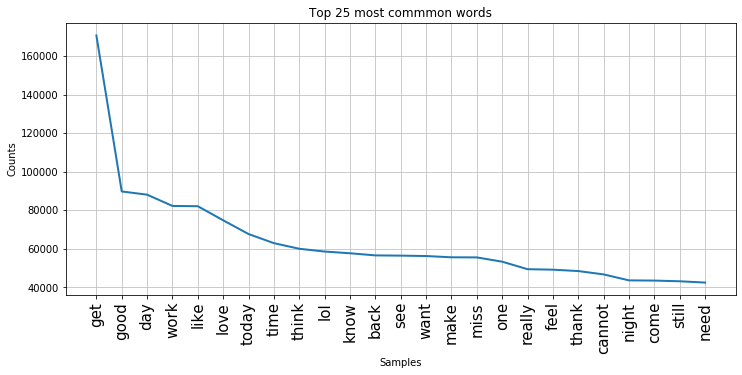

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


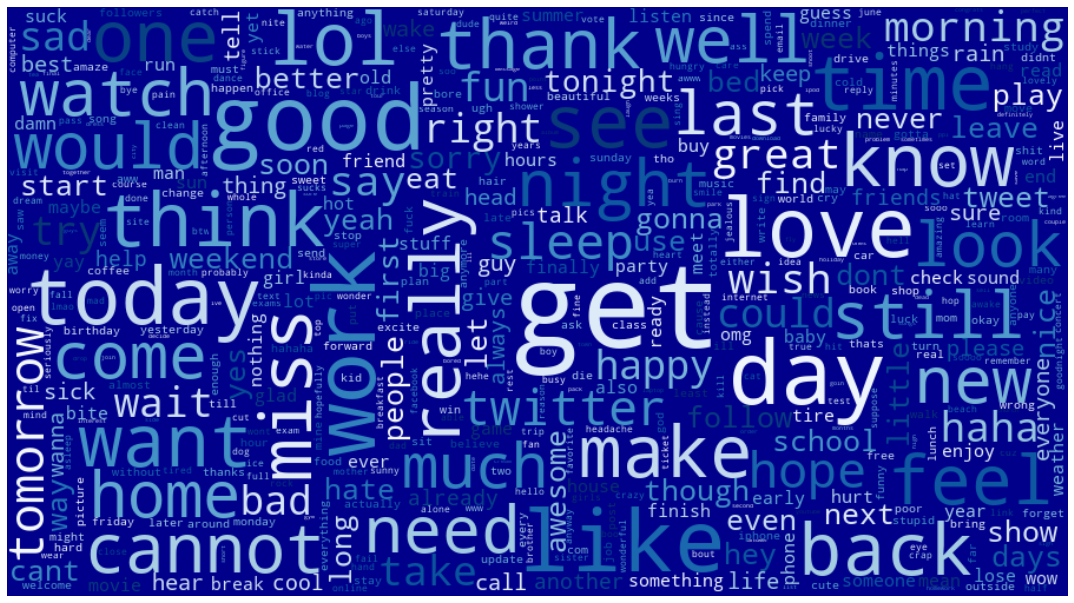

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud
import collections
wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True,background_color ='darkblue', stopwords = stopwords).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()